In [1]:
import os
import numpy as np
import cv2, pydicom
import matplotlib.pyplot as plt

In [117]:
class Dicom():
    def __init__(self, dicom_path=None, window_center=None, window_width=None, auto=None):
        self.dicom_path = dicom_path
        self.window_center = window_center
        self.window_width = window_width
        self.auto = auto
        
        self.hu_img = self.dicom_to_array(self.dicom_path)
        if auto == "all":
            self.window_center, self.window_width = self.get_min_max_window(self.hu_img)
        if self.window_center is not None and self.window_width is not None:
            self.img = self.dicom_windowing(self.hu_img, self.window_center, self.window_width)

    def dicom_to_array(self, dicom_path):
        self.slice = pydicom.read_file(dicom_path)
        s = int(self.slice.RescaleSlope)
        b = int(self.slice.RescaleIntercept)
        return s * self.slice.pixel_array + b

    def get_min_max_window(self, hu_img):
        img_min = np.min(hu_img)
        img_max = np.max(hu_img)
        window_center = (img_max + img_min) / 2
        window_width = img_max - img_min
        return window_center, window_width

    def dicom_windowing(self, image, window_center, window_width):
        img_min = window_center - window_width / 2
        img_max = window_center + window_width / 2
        window_img = np.clip(image, img_min, img_max)
        return window_img
    
    def get_image(self):
        return self.img
    
    def get_hu_image(self):
        return self.hu_img
    
    def change_window(self, window_center, window_width):
        self.window_center = window_center
        self.window_width = window_width
        self.img = self.dicom_windowing(self.hu_img, self.window_center, self.window_width)

In [118]:
data_list = os.listdir('data/Sample1')
dicom_path = os.path.join('data/Sample1',data_list[0])
dicom_file = Dicom(dicom_path=dicom_path, auto="all")
image = dicom_file.get_image()
hu_img = dicom_file.get_hu_image()

In [119]:
print(data_list[0])

4625.38405.33988.17340.36372.43091.37138.15103.100.0.dcm


Text(0.5, 1.0, 'Window Center : 290.5, Window Width : 1275')

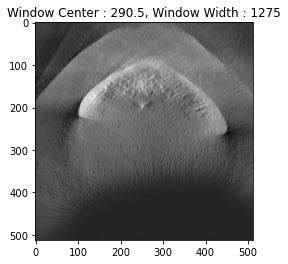

In [120]:
plt.imshow(image, cmap="gray")
plt.title(f"Window Center : {dicom_file.window_center}, Window Width : {dicom_file.window_width}")

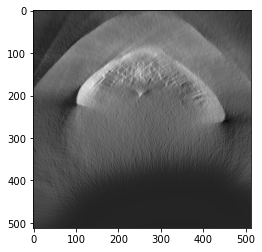

In [121]:
plt.imshow(hu_img, cmap='gray')

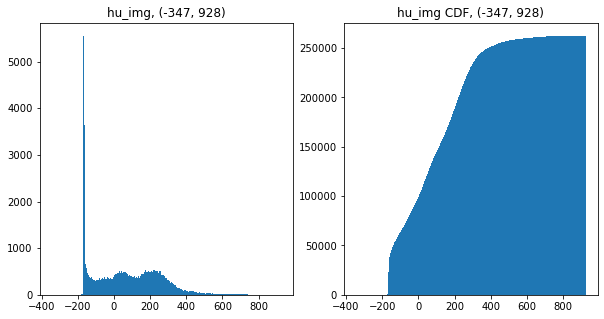

In [122]:
hist1, bins1 = np.histogram(hu_img.flatten(), int(np.max(hu_img) - np.min(hu_img)), [np.min(hu_img), np.max(hu_img)])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(hu_img.flatten(), bins1)
plt.title(f"hu_img, {np.min(hu_img), np.max(hu_img)}")
plt.subplot(1, 2, 2)
plt.hist(hu_img.flatten(), bins1, cumulative=True)
plt.title(f"hu_img CDF, {np.min(hu_img), np.max(hu_img)}")
plt.show()

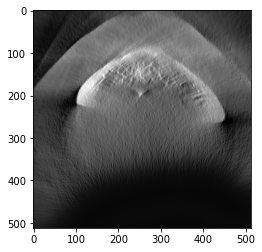

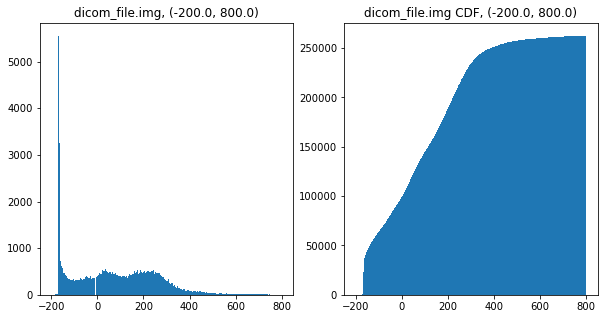

In [128]:
dicom_file.change_window(300, 1000)
plt.imshow(dicom_file.img, cmap="gray")

hist2, bins2 = np.histogram(dicom_file.img.flatten(), int(np.max(dicom_file.img) - np.min(dicom_file.img)), [np.min(dicom_file.img), np.max(dicom_file.img)])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(dicom_file.img.flatten(), bins2)
plt.title(f"dicom_file.img, {np.min(dicom_file.img), np.max(dicom_file.img)}")
plt.subplot(1, 2, 2)
plt.hist(dicom_file.img.flatten(), bins2, cumulative=True)
plt.title(f"dicom_file.img CDF, {np.min(dicom_file.img), np.max(dicom_file.img)}")
plt.show()

In [129]:
new_hu_img = np.max(hu_img) / (1 + np.exp(-0.01*(hu_img - 200)))

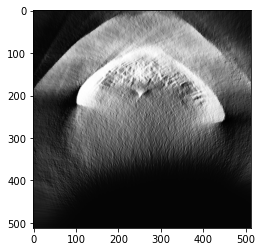

In [130]:
plt.imshow(new_hu_img, cmap='gray')

In [131]:
np.min(new_hu_img), np.max(new_hu_img)

(3.891634864731708, 927.36087627174)

In [132]:
new_hu_img

array([[77.18426235, 90.91505039, 88.48430343, ..., 69.7485816 ,
        73.71897364, 62.39171415],
       [65.97551419, 82.2845195 , 94.24854109, ..., 68.46936805,
        66.59099922, 48.39850654],
       [66.59099922, 75.78071707, 86.89626096, ..., 69.10625311,
        60.10374687, 46.59606152],
       ...,
       [56.8178791 , 56.8178791 , 56.28682228, ..., 24.20602174,
        24.44288861, 24.44288861],
       [52.69757579, 52.69757579, 52.69757579, ..., 24.20602174,
        24.20602174, 24.20602174],
       [52.20272236, 52.20272236, 52.69757579, ..., 24.44288861,
        24.44288861, 24.44288861]])

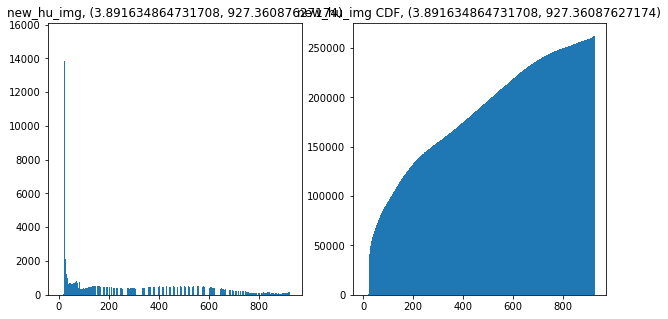

In [133]:
hist3, bins3 = np.histogram(new_hu_img.flatten(), int(np.max(new_hu_img) - np.min(new_hu_img)), [np.min(new_hu_img), np.max(new_hu_img)])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(new_hu_img.flatten(), bins3)
plt.title(f"new_hu_img, {np.min(new_hu_img), np.max(new_hu_img)}")
plt.subplot(1, 2, 2)
plt.hist(new_hu_img.flatten(), bins3, cumulative=True)
plt.title(f"new_hu_img CDF, {np.min(new_hu_img), np.max(new_hu_img)}")
plt.show()

In [140]:
cdf1 = hist1.cumsum()

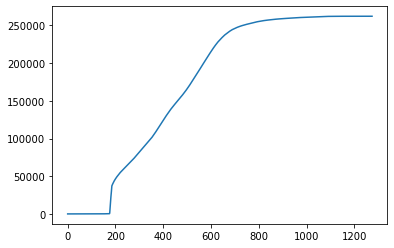

In [141]:
plt.plot(cdf1)

In [153]:
cdf_m = np.ma.masked_equal(cdf1, 0)

cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())

cdf = np.ma.filled(cdf_m, 0).astype('uint8')

In [154]:
cdf

array([  0,   0,   0, ..., 254, 254, 255], dtype=uint8)

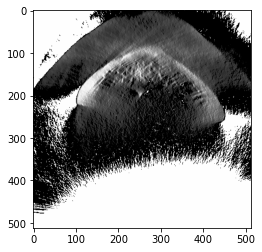

In [158]:
plt.imshow(cdf[hu_img], cmap='gray')

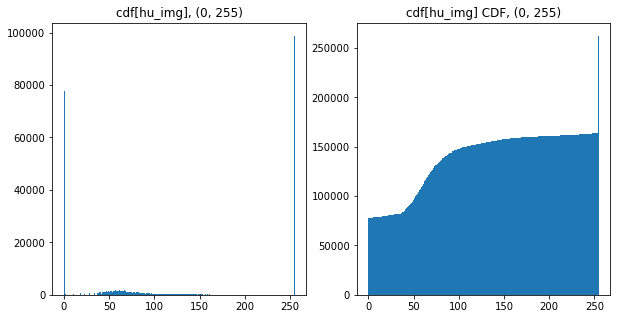

In [163]:
hist4, bins4 = np.histogram(cdf[hu_img].flatten(), int(np.max(cdf[hu_img]) - np.min(cdf[hu_img])), [np.min(cdf[hu_img]), np.max(cdf[hu_img])])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(cdf[hu_img].flatten(), bins4)
plt.title(f"cdf[hu_img], {np.min(cdf[hu_img]), np.max(cdf[hu_img])}")
plt.subplot(1, 2, 2)
plt.hist(cdf[hu_img].flatten(), bins4, cumulative=True)
plt.title(f"cdf[hu_img] CDF, {np.min(cdf[hu_img]), np.max(cdf[hu_img])}")
plt.show()